## 1) Import Necessary Libraries

In [ ]:
import pandas as pd
from sklearn.tree import _tree
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import accuracy_score




## 2) Load training dataset

*  Read the .csv file with pandas library



In [ ]:
# Read data
df = pd.read_csv('/content/data_scientist_job_change.csv')


## 3) Understanding the dataset



In [ ]:
# print shape
print('Data Dimensionality: ', df.shape)

print('Data attribute names: ', df.columns)

# print first 5 rows in your dataset
print('Head of Data: ', df.head(5))



# print nan values for each column
print('NaN values: ',df.isna() )


Data Dimensionality:  (19158, 6)
Data attribute names:  Index(['city_development_index', 'relevent_experience', 'education_level',
       'experience', 'training_hours', 'target'],
      dtype='object')
Head of Data:     city_development_index  relevent_experience  education_level  experience  \
0                   0.920                    1              2.0        25.0   
1                   0.776                    0              2.0        15.0   
2                   0.624                    0              2.0         5.0   
3                   0.789                    0              2.0         0.0   
4                   0.767                    1              3.0        25.0   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0  
NaN values:         city_development_index  relevent_experience  education_level  \
0                       False                False     

## 4) Handling Missing Data


In [ ]:
###
df=df.dropna(how="any")

## 5) Shuffle and Split training, test and validation sets as 60%-20%-20%, respectively.

In [ ]:


# Shuffle the training data and define X and y

index = [i for i in range(df.shape[0])]
random.shuffle(index)
df.set_index([index]).sort_index()

X = df.drop(['target'],axis=1)
y=df['target']
# Split as 60%-20%-20%
X_train, X_remaining,y_train, y_remaining= train_test_split(X,y, test_size=0.40,)
X_test, X_val,y_test, y_val = train_test_split(X_remaining,y_remaining, test_size=0.50)



## 6) Train a decision tree classifier on development/train data and do model selection using the validation data


Validation accuracy:  0.697774202198981
Validation accuracy:  0.6999195494770716
Validation accuracy:  0.7133279699651381
Validation accuracy:  0.7213730222579781
Validation accuracy:  0.7216411906677394


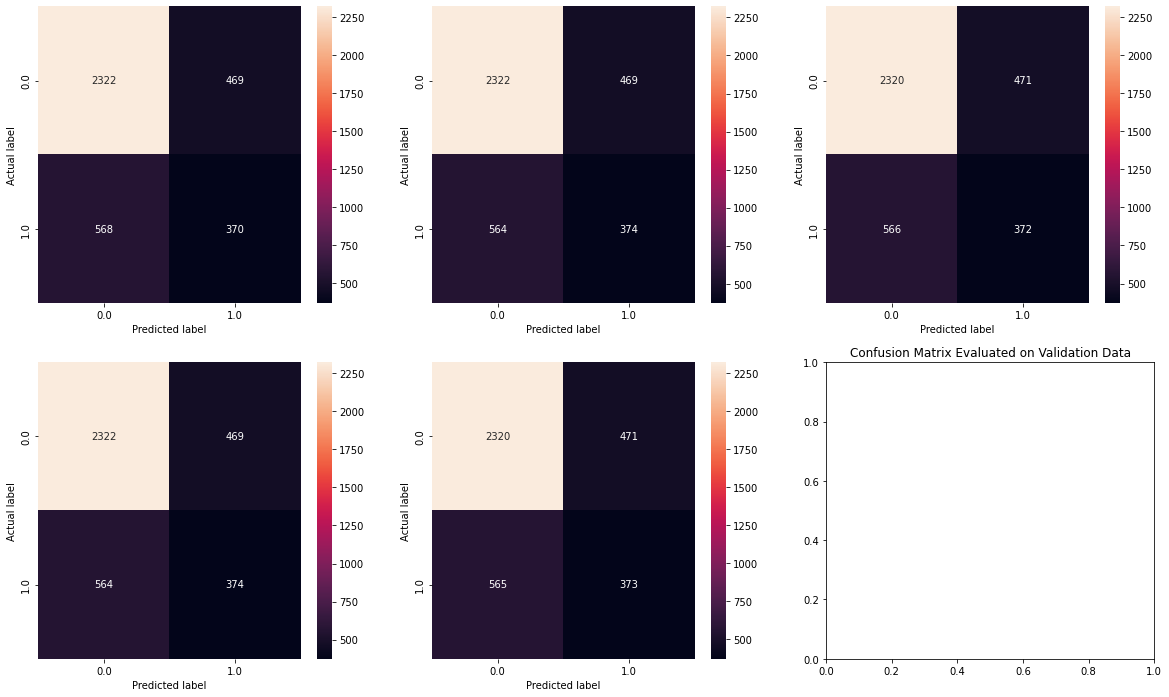

In [ ]:
tut_data=[]
min_s = [2, 4, 6, 8, 10]
# Train decision tree classifiers & Evaluate on validation set

for i in range(len(min_s)):

    # initalize the model
  clf = DecisionTreeClassifier(min_samples_split=min_s[i])


  clf.fit(X_train, y_train)


  # calculate the accuracy on validation set
  val_score = clf.score(X_val, y_val)
  best_bul=val_score
  print("Validation accuracy: ", val_score)
  tut_data.append(val_score)
  if (val_score>=best_bul) or (best<=val_score):
    best=val_score
    yer=i



# Plot errors
c=0
fig, axarr = plt.subplots(2, 3, figsize=(20, 12))
for i in range(len(min_s)):
  clf.fit(X_train, y_train)
  x_pred=clf.predict(X_val)
  #model.fit(X_test, x_pred)
  data = {'y_Actual':    y_val,
          'y_Predicted': x_pred
          }

  df2 = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
  confusion_matrix = pd.crosstab(df2['y_Actual'], df2['y_Predicted'], rownames=['Actual label'], colnames=['Predicted label'])

  sn.heatmap(confusion_matrix, annot=True, fmt="d",ax=axarr[c][i%3])
  if (i==2):
    c=1
  plt.title('Confusion Matrix Evaluated on Validation Data')

  #plt.show()




## 7) Test your CHOSEN classifier on Test set



In [ ]:
# You may want to train your BEST decision tree model on both training and validation sets. To merge these two, you may use
# concat() method of pandas

clf = DecisionTreeClassifier(min_samples_split=min_s[yer])
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


test_score = accuracy_score(predictions, y_test)
print("Test score: ", test_score)


# test prediction using a decision tree with all default parameters and ..... min-split value



# Report your accuracy




Test score:  0.7119871279163315


## 8) Bonus Section: Extract the rules



In [ ]:

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    print("def predict({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
rules = tree_to_code(clf, df.columns)

def predict(city_development_, relevent_exper, education_, exper, training_, t):
    if city_development_index <= 0.62:
        if city_development_index <= 0.5:
            if relevent_experience <= 0.5:
                if training_hours <= 160.5:
                    return [[ 0. 17.]]
                else:  # if training_hours > 160.5
                    return [[1. 0.]]
            else:  # if relevent_experience > 0.5
                return [[4. 5.]]
        else:  # if city_development_index > 0.5
            if education_level <= 1.5:
                if experience <= 4.5:
                    if relevent_experience <= 0.5:
                        if training_hours <= 11.5:
                            return [[6. 1.]]
                        else:  # if training_hours > 11.5
                            if training_hours <= 30.5:
                                if training_hours <= 19.0:
                                    if education_level <= 0.5:
                                 

# **REPORT**

Please write down the answers to the questions above.

The data set consist of 5 features called city_development_index, relevant_experience, education_level, experience and training_hours. These features are ordinal, binary, categorical and last two are real-valued features in terms of feature type. Based on this features it is asked that the binary label called target  should be 	predicted. 

Decision Tree is an algorithm that belongs to supervised Learning type because the input and the corresponding output in the training data is known which means labeled. Decision Tree can be used for both Classification and Regression but since our label variable is categorical so Classification tree is used. 

The validation set is used for finding best hyper parameters for our model by checking accuracy on validation data.

As it can be seen from the table below min sample split with 10 is choosen because it has best validation accuracy.

It is  obtained that the best results with the min sample split = 10, giving classification accuracy of %71.1198 on test data.

In [ ]:
tut_data=pd.DataFrame(tut_data)
tut_data.columns=['Validation Accuracies ']
tut_data['min_samples_split']=min_s
display(tut_data)

,Validation Accuracies,min_samples_split
0,0.697774,2
1,0.699920,4
2,0.713328,6
3,0.721373,8
4,0.721641,10
